#Dhermendra Kumar Tiwari
#Task-8
#GO_STP_3831



#HR Analytics with Logistic Regression.

In [ ]:
"""Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it.
An organization is only as good as its employees, and these people are the true source of its competitive advantage.
Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics
First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python."""


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
df.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


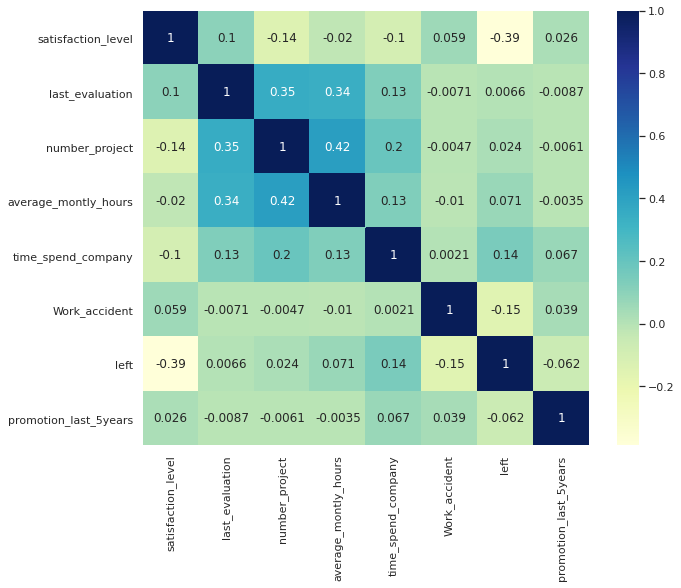

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df.corr().round(4)
sns.heatmap(data=correlation_matrix, annot=True ,cmap="YlGnBu")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


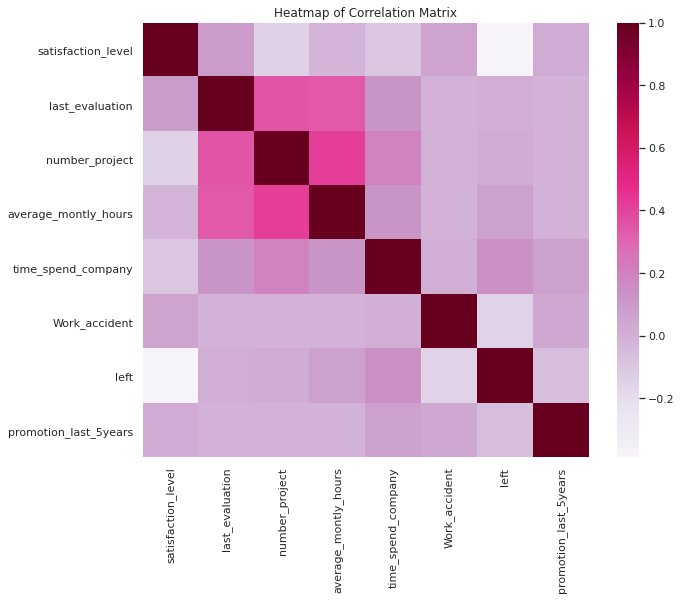

In [13]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values,cmap='PuRd')
plt.title('Heatmap of Correlation Matrix')
corr


In [17]:
emp_population_satisfaction = df['satisfaction_level'].mean()
emp_turnover_satisfaction = df[df['left']==1]['satisfaction_level'].mean()
print( 'The mean for the employee population is: ' +
str(emp_population_satisfaction) )
print( 'The mean for the employees that had a left is: ' + str(emp_turnover_satisfaction))


The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a left is: 0.44009801176140917


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

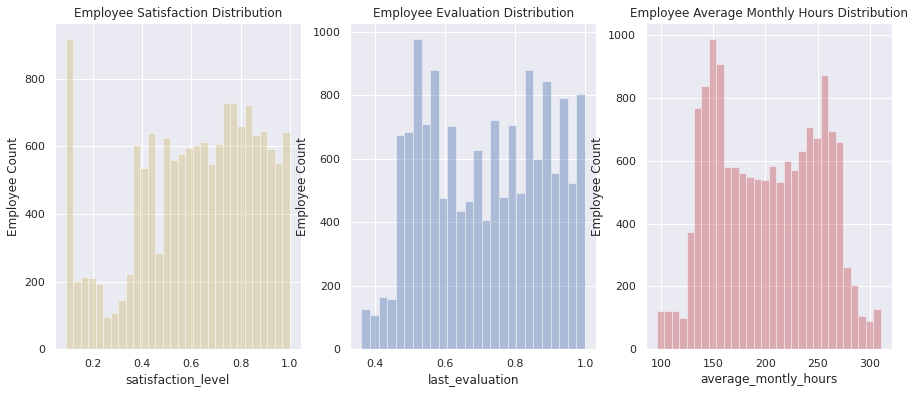

In [19]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(df.satisfaction_level, kde=False, color="y", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')
sns.distplot(df.last_evaluation, kde=False, color="b", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')
sns.distplot(df.average_montly_hours, kde=False, color="r", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

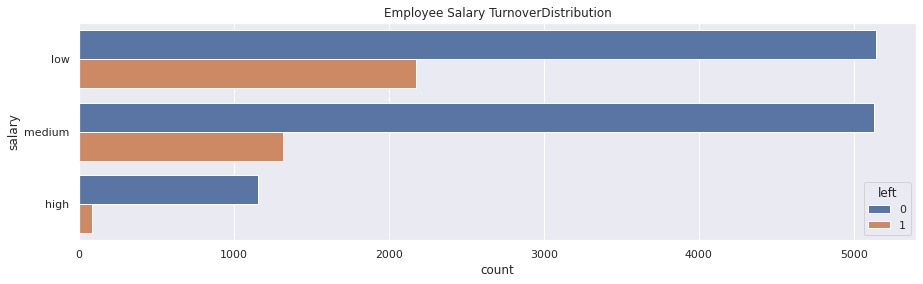

In [21]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=df).set_title('Employee Salary TurnoverDistribution');

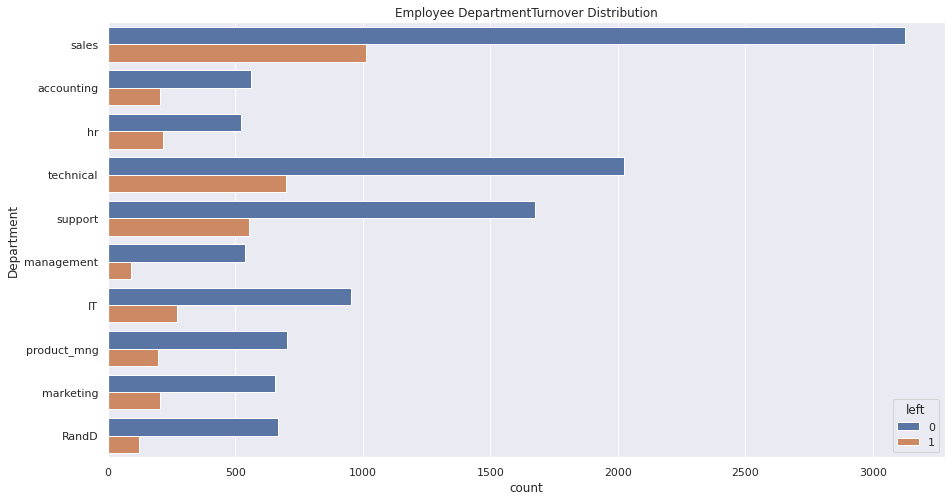

In [22]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Department", hue='left', data=df).set_title('Employee DepartmentTurnover Distribution');

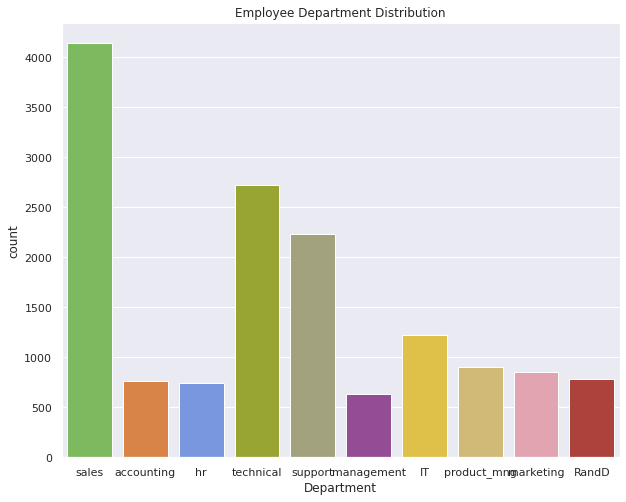

In [23]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
'#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

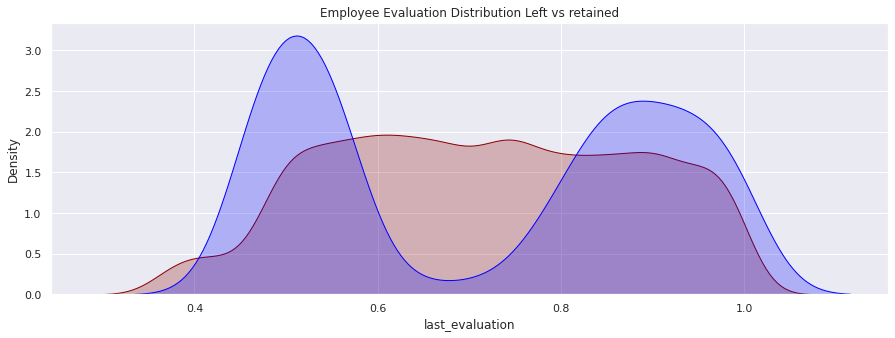

In [27]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['left'] == 0),'last_evaluation'] , color='darkred',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'last_evaluation'] , color='blue',shade=True)
plt.title('Employee Evaluation Distribution Left vs retained')

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

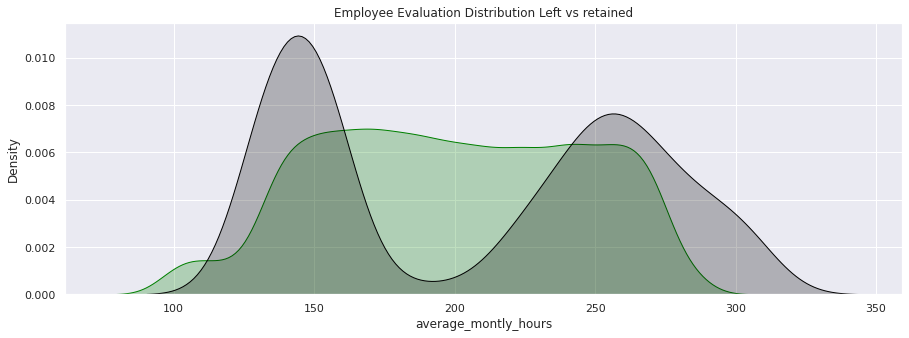

In [29]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'average_montly_hours'] , color='green',shade=True)
ax=sns.kdeplot(df.loc[(df['left'] == 1),'average_montly_hours'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

Text(0.5, 1.0, 'Employee Evaluation Distribution Left vs retained')

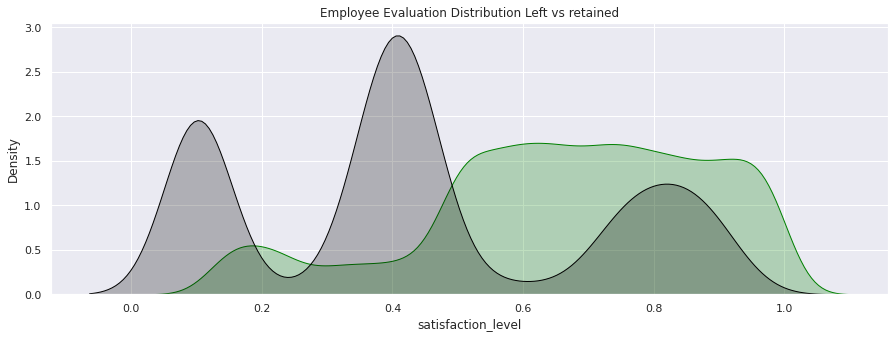

In [31]:
fig = plt.figure(figsize=(15,5))
ax=sns.kdeplot(df.loc[(df['left'] == 0),'satisfaction_level'] , color='green',shade=True )
ax=sns.kdeplot(df.loc[(df['left'] == 1),'satisfaction_level'] , color='black',shade=True )
plt.title('Employee Evaluation Distribution Left vs retained')

In [32]:
data = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [33]:
salary = pd.get_dummies(data['salary'], prefix='salary')
salary

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [34]:
new_df = pd.concat([data,salary],axis=1)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [35]:
new_df.drop(['salary','salary_high'], axis=1, inplace=True)
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [36]:
X = new_df.copy()
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [37]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30,random_state=99)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((10499, 5), (4500, 5), (10499,), (4500,))

In [42]:
y_pred = lr.predict(test_x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix

In [47]:
confusion_matrix(test_y,y_pred)

array([[3202,  229],
       [ 795,  274]])

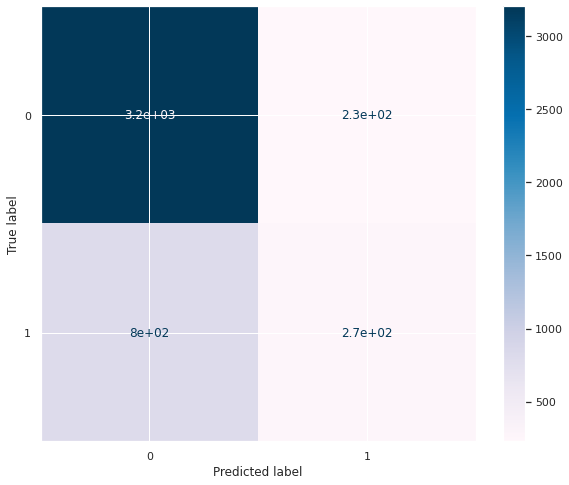

In [48]:
plot_confusion_matrix(lr, test_x, test_y,cmap=plt.cm.PuBu)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


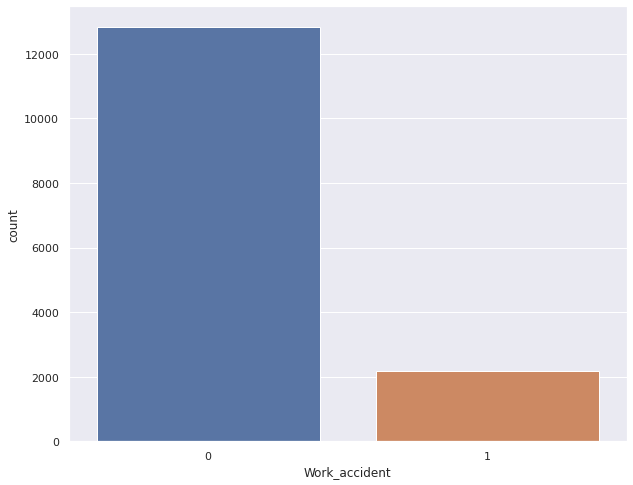

In [49]:
sns.countplot(df['Work_accident'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


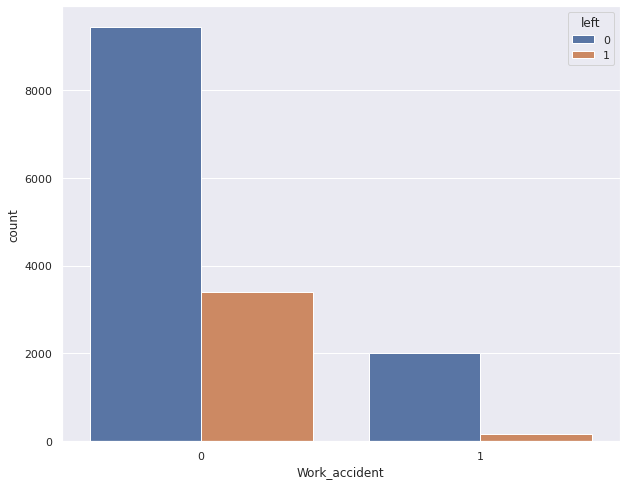

In [50]:
sns.countplot(df['Work_accident'],hue=df['left'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


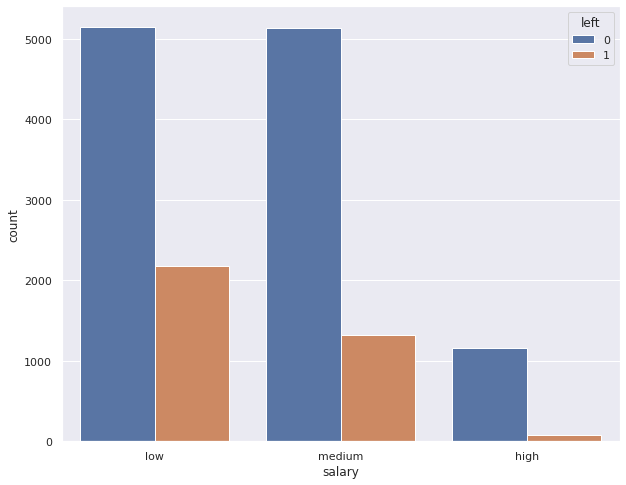

In [51]:
sns.countplot(df['salary'],hue=df['left'])

In [52]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [53]:
def sal_class(x):
    if x == "low":
        return 1
    elif x == "medium":
        return 2
    elif x == "high":
        return 3

In [54]:
df['sal_class'] = df['salary'].apply(sal_class)
df['sal_class'].value_counts()

1    7316
2    6446
3    1237
Name: sal_class, dtype: int64

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  ...  Department  salary
0                    0.38             0.53  ...       sales     low
1                    0.80             0.86  ...       sales  medium
2                    0.11             0.88  ...       sales  medium
3                    0.72             0.87  ...       sales     low
4                    0.37             0.52  ...       sales     low
...                   ...              ...  ...         ...     ...
14994                0.40             0.57  ...     support     low
14995                0.37             0.48  ...     support     low
14996                0.37             0.53  ...     support     low
14997                0.11             0.96  ...     support     low
14998                0.37             0.52  ...     support     low

[14999 rows x 10 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


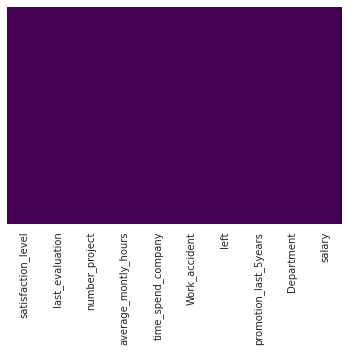

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [ ]:
df[df.isnull()].count()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

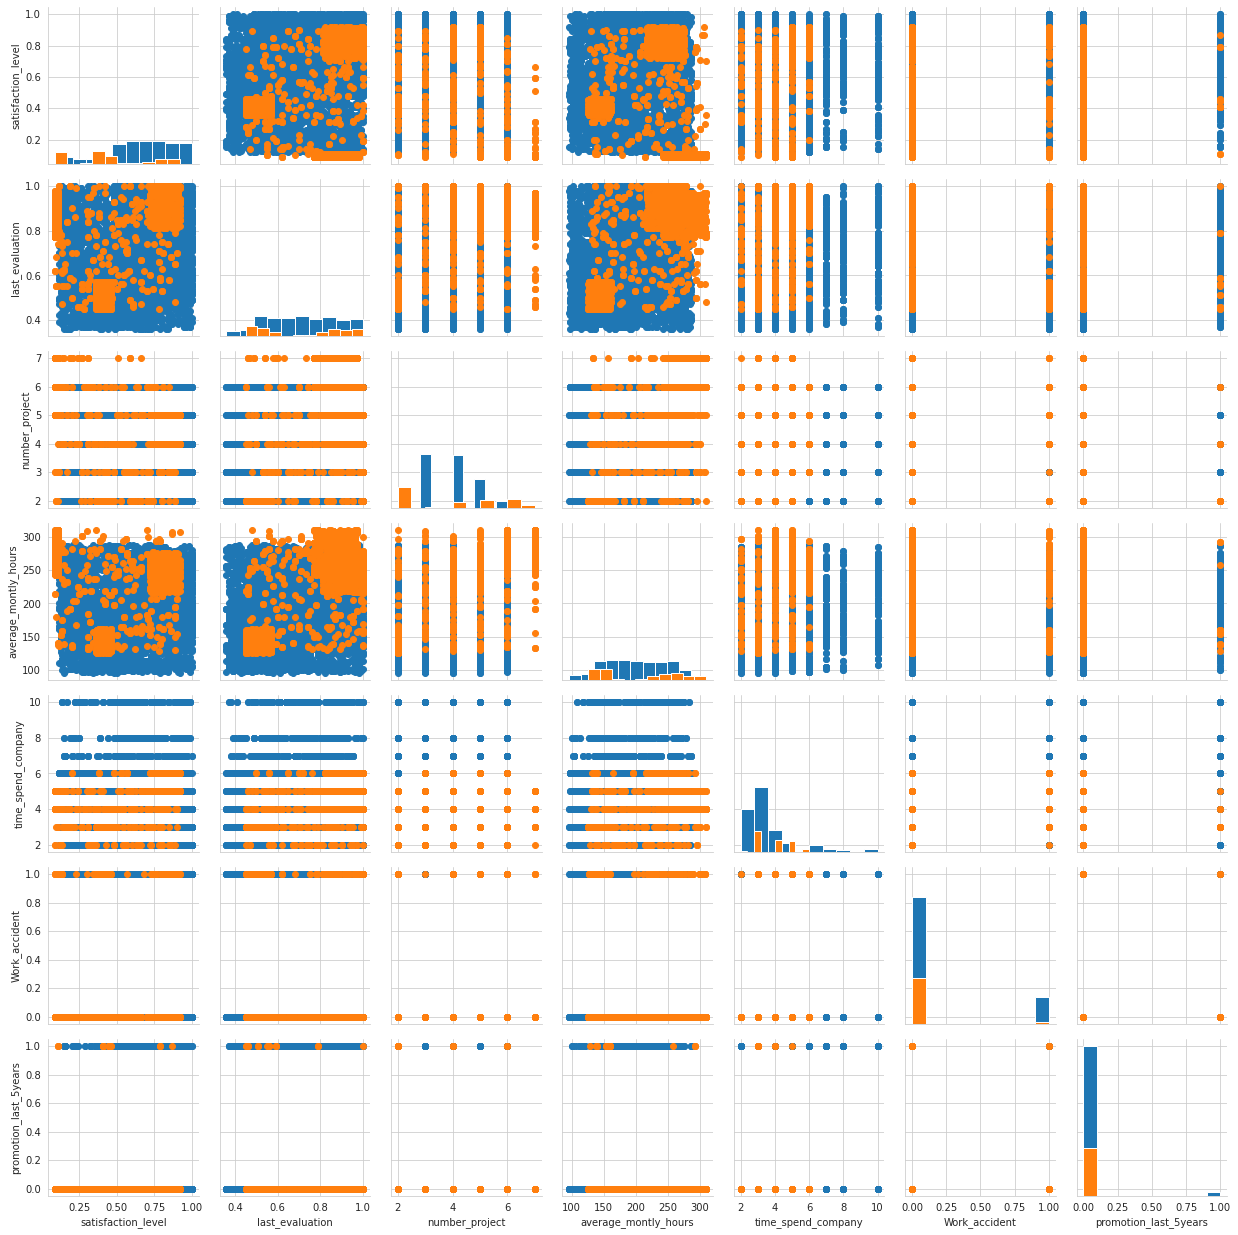

In [ ]:
g = sns.PairGrid(df,hue='left')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

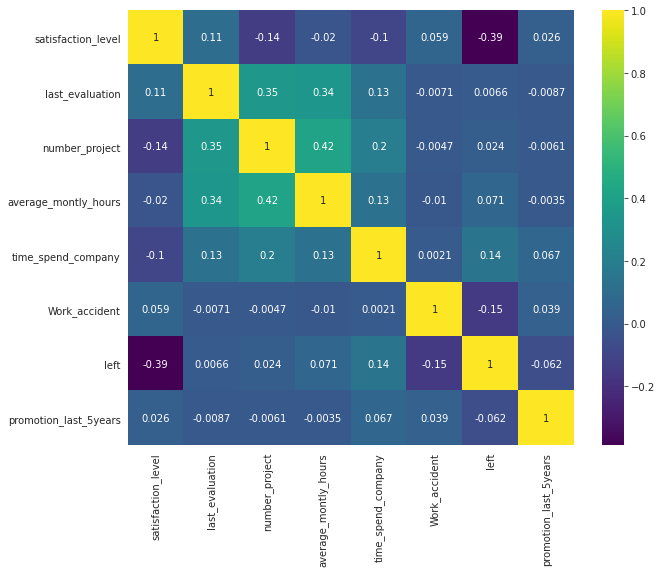

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


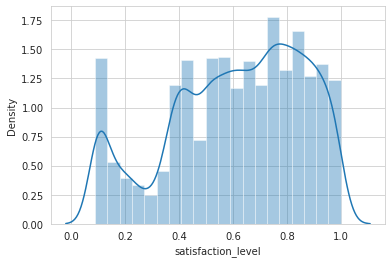

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['satisfaction_level'],bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


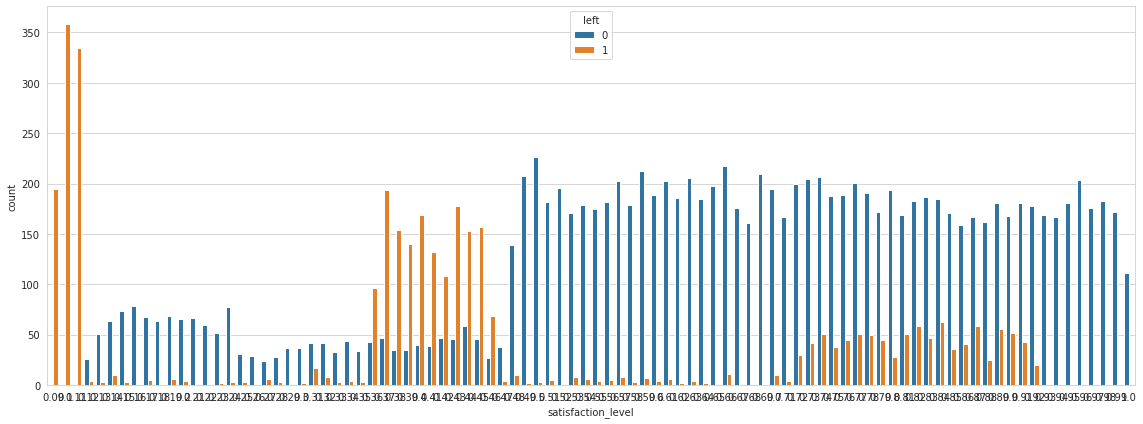

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df['satisfaction_level'],hue=df['left'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


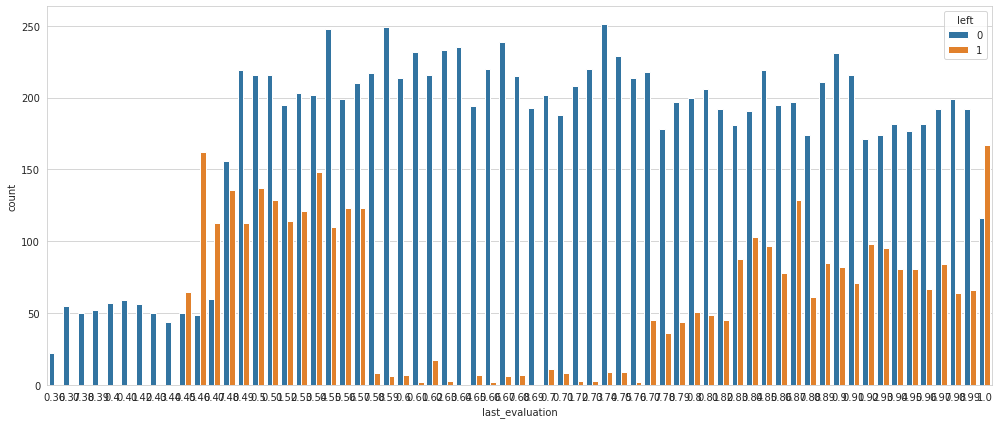

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(df['last_evaluation'],hue=df['left'])
plt.tight_layout()

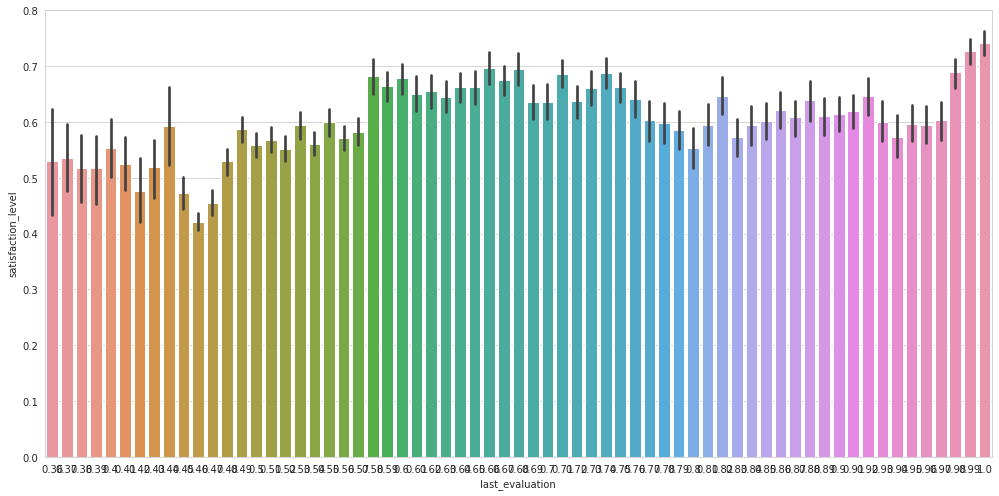

In [ ]:
plt.figure(figsize=(14,7))
df = sns.barplot(x=df['last_evaluation'],y=df['satisfaction_level'])
plt.tight_layout()